In [105]:
!pip install pandas seaborn scikit-learn xgboost matplotlib torch numpy

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import model_selection
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [64]:
#解决matplotlib绘图中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['font.sans-serif'] = ['KaiTi']   # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False   # 解决保存图像是负号'-'显示为方块的问题

# 数据导入、处理

In [144]:
data = pd.read_csv(r'C:/Users/78768/Desktop/多元大作业/wineqt/winequality-red.csv')
#将红酒质量>6.5划分为好【用0表示】
data['quality_two'] = data['quality'].apply(lambda x: '0' if x > 6.5 else '1')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_two
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [146]:
#训练集，测试集划分
x = data.iloc[:,0:10]
y = data.iloc[:,12]
feature = x.columns
label = data.iloc[:,12]
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,random_state=7,test_size=0.3)

In [147]:
#数据标准化
scaler = StandardScaler()
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

<Axes: >

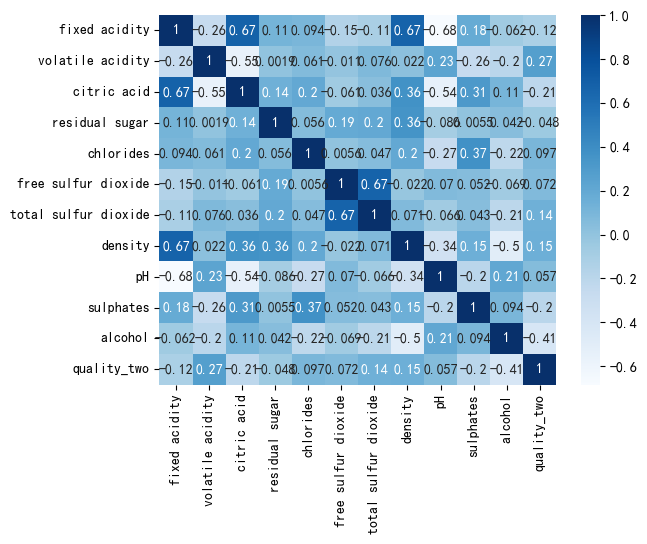

In [148]:
data.drop(data.columns[11], axis=1).corr()
sns.heatmap(data.drop(data.columns[11], axis=1).corr(), cmap='Blues', annot=True)

# 线性判别分析

In [149]:
line_model = LinearDiscriminantAnalysis()
line_model.fit(x,y)
line_model.score(x,y)

0.8717948717948718

In [112]:
#模型先验概率
line_model.priors_

array([0.44393382, 0.42463235, 0.13143382])

In [113]:
#特征变量分组均值
line_model.means_

array([[ 8.1610766 ,  0.5852795 ,  0.24012422,  2.54047619,  0.09177019,
        16.61283644, 55.29917184,  0.99707265,  3.3020911 ,  0.61337474],
       [ 8.31774892,  0.50495671,  0.26367965,  2.44480519,  0.08528139,
        15.21536797, 39.94155844,  0.99660955,  3.32378788,  0.6765368 ],
       [ 8.85104895,  0.39367133,  0.38657343,  2.76013986,  0.07521678,
        14.53846154, 37.48951049,  0.99607084,  3.28713287,  0.74356643]])

In [114]:
#线性判元对于组间方差的贡献
line_model.explained_variance_ratio_

array([0.93652709, 0.06347291])

In [115]:
#线性判元的估计系数
line_model.scalings_

array([[ 5.61348595e-01, -1.45383184e-01],
       [-2.09327837e+00,  1.73319287e+00],
       [ 3.58105122e-01,  4.28667615e+00],
       [ 3.11954753e-01,  2.29704132e-01],
       [-4.66018178e+00, -6.08288564e+00],
       [ 7.72163465e-03, -3.44510965e-02],
       [-1.14223564e-02,  2.00299842e-02],
       [-5.62953397e+02, -1.91392429e+02],
       [ 2.90166982e+00, -2.45303637e+00],
       [ 3.39632525e+00, -7.36458742e-01]])

In [116]:
#变为数据框展示
lda_loadings = pd.DataFrame(line_model.scalings_, index=feature, columns=['LD1', 'LD2'])
lda_loadings

,LD1,LD2
非挥发性酸,0.561349,-0.145383
挥发性酸,-2.093278,1.733193
柠檬酸,0.358105,4.286676
残糖,0.311955,0.229704
氯化物,-4.660182,-6.082886
游离二氧化硫,0.007722,-0.034451
总二氧化硫,-0.011422,0.020030
密度,-562.953397,-191.392429
酸碱度,2.901670,-2.453036
硫酸盐,3.396325,-0.736459


<Axes: xlabel='LD1', ylabel='LD2'>

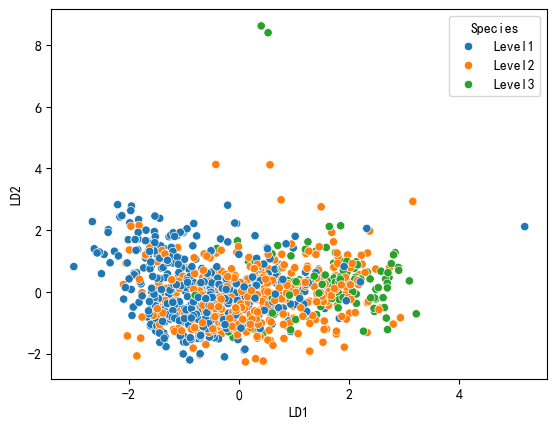

In [117]:
lda_scores = line_model.fit(x, y).transform(x) #或lda_scores = model.fit_transform(X, y)
lda_scores.shape
lda_scores[:5, :]
 
LDA_scores = pd.DataFrame(lda_scores, columns=['LD1', 'LD2'])
LDA_scores['Species'] = label
LDA_scores.head()
 
#d = {0: 'Level1', 1: 'Level2', 2: 'Level3'}
#LDA_scores['Species'] = LDA_scores['Species'].map(d) 
LDA_scores.head()
 
sns.scatterplot(x='LD1', y='LD2', data=LDA_scores, hue='Species')

# 二次判别分析

In [118]:
qua_model = QuadraticDiscriminantAnalysis()
qua_model.fit(x_train, y_train)
qua_model.score(x_test, y_test)

0.5657492354740061

# 随机森林

# SVM模型

In [119]:
classifier = svm.SVC(kernel='linear', gamma=0.1, decision_function_shape='ovo')
classifier.fit(x_train,y_train.ravel())

C:\Users\78768\AppData\Local\Temp\ipykernel_13976\641663775.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  classifier.fit(x_train,y_train.ravel())


SVC(decision_function_shape='ovo', gamma=0.1, kernel='linear')

In [120]:
print("SVM-输出训练集的准确率为：",classifier.score(x_train,y_train))
print("SVM-输出测试集的准确率为：",classifier.score(x_test,y_test))

SVM-输出训练集的准确率为： 0.6189224704336399
SVM-输出测试集的准确率为： 0.6085626911314985


# XGBOOST模型

In [121]:
model = XGBClassifier()
model.fit(x_train, y_train, verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [122]:
print("SVM-输出训练集的准确率为：",model.score(x_train,y_train))
print("SVM-输出测试集的准确率为：",model.score(x_test,y_test))

SVM-输出训练集的准确率为： 1.0
SVM-输出测试集的准确率为： 0.6666666666666666


In [123]:
eval_set = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-merror:0.21419	validation_0-mlogloss:0.92490	validation_1-merror:0.37615	validation_1-mlogloss:0.97826
[1]	validation_0-merror:0.18922	validation_0-mlogloss:0.80649	validation_1-merror:0.35780	validation_1-mlogloss:0.91379
[2]	validation_0-merror:0.17477	validation_0-mlogloss:0.71761	validation_1-merror:0.36086	validation_1-mlogloss:0.86136
[3]	validation_0-merror:0.13666	validation_0-mlogloss:0.64350	validation_1-merror:0.32722	validation_1-mlogloss:0.82183
[4]	validation_0-merror:0.12352	validation_0-mlogloss:0.58685	validation_1-merror:0.33945	validation_1-mlogloss:0.80131
[5]	validation_0-merror:0.11170	validation_0-mlogloss:0.53495	validation_1-merror:0.34251	validation_1-mlogloss:0.79112
[6]	validation_0-merror:0.08279	validation_0-mlogloss:0.48359	validation_1-merror:0.33639	validation_1-mlogloss:0.77567
[7]	validation_0-merror:0.07490	validation_0-mlogloss:0.44518	validation_1-merror:0.33333	validation_1-mlogloss:0.76461
[8]	validation_0-merror:0.06307	validati

D:\app\anaconda3\envs\pytorch\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[66]	validation_0-merror:0.00000	validation_0-mlogloss:0.04114	validation_1-merror:0.31804	validation_1-mlogloss:0.85573
[67]	validation_0-merror:0.00000	validation_0-mlogloss:0.04038	validation_1-merror:0.31804	validation_1-mlogloss:0.85889
[68]	validation_0-merror:0.00000	validation_0-mlogloss:0.03967	validation_1-merror:0.31804	validation_1-mlogloss:0.85887
[69]	validation_0-merror:0.00000	validation_0-mlogloss:0.03868	validation_1-merror:0.31804	validation_1-mlogloss:0.86069
[70]	validation_0-merror:0.00000	validation_0-mlogloss:0.03793	validation_1-merror:0.32110	validation_1-mlogloss:0.86299
[71]	validation_0-merror:0.00000	validation_0-mlogloss:0.03714	validation_1-merror:0.31804	validation_1-mlogloss:0.86664
[72]	validation_0-merror:0.00000	validation_0-mlogloss:0.03674	validation_1-merror:0.32416	validation_1-mlogloss:0.86879
[73]	validation_0-merror:0.00000	validation_0-mlogloss:0.03591	validation_1-merror:0.32110	validation_1-mlogloss:0.87405
[74]	validation_0-merror:0.00000

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [124]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

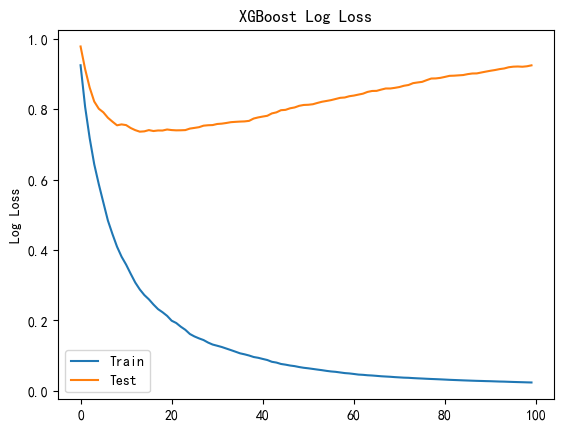

In [125]:
#XGBoost 模型在训练和测试数据集上每个时期的对数损失
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

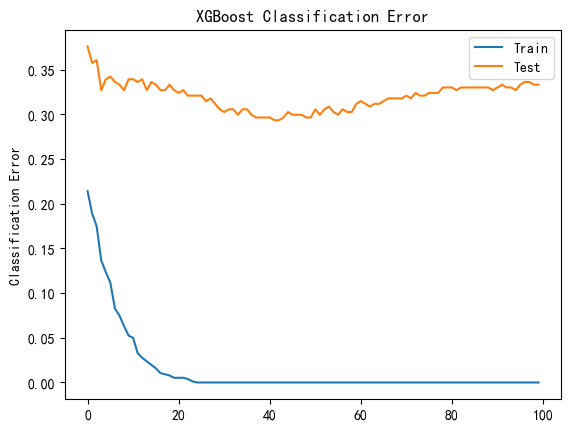

In [126]:
#XGBoost模型在训练和测试数据集上每个epoch的分类误差
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [127]:
model = XGBClassifier(early_stopping_rounds=5, gamma=0.01)
eval_set = [(x_test, y_test)]
model.fit(x_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-mlogloss:0.97826
[1]	validation_0-mlogloss:0.91379
[2]	validation_0-mlogloss:0.86136
[3]	validation_0-mlogloss:0.82183
[4]	validation_0-mlogloss:0.80131
[5]	validation_0-mlogloss:0.79112
[6]	validation_0-mlogloss:0.77567
[7]	validation_0-mlogloss:0.76461
[8]	validation_0-mlogloss:0.75425
[9]	validation_0-mlogloss:0.75685
[10]	validation_0-mlogloss:0.75860
[11]	validation_0-mlogloss:0.75821
[12]	validation_0-mlogloss:0.75052
[13]	validation_0-mlogloss:0.74990
[14]	validation_0-mlogloss:0.74722
[15]	validation_0-mlogloss:0.74389
[16]	validation_0-mlogloss:0.74373
[17]	validation_0-mlogloss:0.74528
[18]	validation_0-mlogloss:0.74571
[19]	validation_0-mlogloss:0.74898
[20]	validation_0-mlogloss:0.74651


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [128]:
print("SVM-输出训练集的准确率为：",model.score(x_train,y_train))
print("SVM-输出测试集的准确率为：",model.score(x_test,y_test))

SVM-输出训练集的准确率为： 0.9894875164257556
SVM-输出测试集的准确率为： 0.6666666666666666


## 1.采用逻辑回归

In [2]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  
from sklearn.exceptions import ConvergenceWarning, DataConversionWarning  
import warnings  
  
# 忽略收敛警告和数据转换警告  
warnings.filterwarnings("ignore", category=ConvergenceWarning)  
warnings.filterwarnings("ignore", category=DataConversionWarning)  
  
# 读取数据  
data_train = pd.read_csv('byh/src/datasets/winequality-red_train.csv')  
data_test = pd.read_csv('byh/src/datasets/winequality-red_test.csv')  
  
# 分割输入和输出变量  
inputs_train = data_train.drop(columns='quality_two').values  
outputs_train = data_train['quality_two'].values.reshape(-1, 1)  # 确保输出是二维数组  
  
inputs_test = data_test.drop(columns='quality_two').values  
outputs_test = data_test['quality_two'].values.reshape(-1, 1)  # 确保输出是二维数组  
  
# 创建逻辑回归模型实例  
model = LogisticRegression()  
  
# 训练模型  
model.fit(inputs_train, outputs_train)  
  
# 预测  
y_pred = model.predict(inputs_test)  
  
# 计算准确率  
accuracy = accuracy_score(outputs_test, y_pred)  
print(f"Accuracy: {accuracy:.4f}")  
  
# 计算精确率、召回率和F1分数  
precision = precision_score(outputs_test, y_pred)  
recall = recall_score(outputs_test, y_pred)  
f1 = f1_score(outputs_test, y_pred)  
  
print(f"Precision: {precision:.4f}")  
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8656
Precision: 0.8783
Recall: 0.9780
F1 Score: 0.9255


## 神经网络

In [5]:
import torch

import pandas as pd
import torch.nn as nn
import torch.optim as optim


from byh.src.models.Model import ClaModel
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

data = pd.read_csv('byh/src/datasets/winequality-red_train.csv')


device = torch.device("cuda")

inputs= data.drop(columns='quality_two').values
outputs = data[["quality_two"]].values

inputs = torch.Tensor(inputs)
outputs = torch.Tensor(outputs)


model = ClaModel(11,32,1)

# 加载模型权重  
model_weights = torch.load("byh/checkpoint/Cla_model-windows.pth")  
  
# 将加载的权重加载到模型实例中  
model.load_state_dict(model_weights) 
model.to(device)

model.eval()

# 将测试集转移到CPU设备上
test_inputs = inputs.to(device)
test_targets = outputs.to(device)

# 通过模型生成预测
predictions = model(test_inputs)


# 将预测转换为类别
predicted_classes = (predictions.squeeze() > 0.5).long()

# 计算准确率
num_correct = (predicted_classes == test_targets.squeeze()).sum().item()
num_total = test_targets.shape[0]
accuracy = num_correct/num_total
# 假设你的任务是二分类，且以0.5为阈值  
predicted_classes = (predictions.squeeze() > 0.5).long()  
  
# 将PyTorch张量转换为NumPy数组，以便与sklearn兼容  
true_classes = test_targets.squeeze().cpu().numpy()  
predicted_classes = predicted_classes.cpu().numpy()  
  
# 计算混淆矩阵  
cm = confusion_matrix(true_classes, predicted_classes)  
  
# 计算F1分数、准确率和召回率  
# 使用classification_report直接输出所有指标  
report = classification_report(true_classes, predicted_classes)  
  
# 或者单独计算F1分数、准确率和召回率  
precision = precision_score(true_classes, predicted_classes)  
recall = recall_score(true_classes, predicted_classes)  
f1 = f1_score(true_classes, predicted_classes)  
  
print(f"Precision: {precision:.4f}")  
print(f"Recall: {recall:.4f}")  
print(f"F1 Score: {f1:.4f}")  

print(f"Test Accuracy: {accuracy:.4f}")   #Test Accuracy：0.8719

Precision: 0.9209
Recall: 0.9766
F1 Score: 0.9479
Test Accuracy: 0.9070
